In [1]:
# Import the dpeendencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"},{"id":211,"main":"Thunderstorm","description":"thunderstorm","icon":"11d"}],"base":"stations","main":{"temp":74.89,"feels_like":72.46,"temp_min":72,"temp_max":78.01,"pressure":1013,"humidity":64},"visibility":16093,"wind":{"speed":11.41,"deg":30},"rain":{"1h":1.02},"clouds":{"all":75},"dt":1594739573,"sys":{"type":1,"id":3486,"country":"US","sunrise":1594718411,"sunset":1594772382},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 211,
   'main': 'Thunderstorm',
   'description': 'thunderstorm',
   'icon': '11d'}],
 'base': 'stations',
 'main': {'temp': 74.89,
  'feels_like': 72.46,
  'temp_min': 72,
  'temp_max': 78.01,
  'pressure': 1013,
  'humidity': 64},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 30},
 'rain': {'1h': 1.02},
 'clouds': {'all': 75},
 'dt': 1594739573,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1594718411,
  'sunset': 1594772382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7e7214cac6abdccd968616b5eabe6&q=Boston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 211,
   'main': 'Thunderstorm',
   'description': 'thunderstorm',
   'icon': '11d'}],
 'base': 'stations',
 'main': {'temp': 74.89,
  'feels_like': 72.46,
  'temp_min': 72,
  'temp_max': 78.01,
  'pressure': 1013,
  'humidity': 64},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 30},
 'rain': {'1h': 1.02},
 'clouds': {'all': 75},
 'dt': 1594739573,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1594718411,
  'sunset': 1594772382},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]["country"]

'US'

In [20]:
boston_data["dt"]

1594739573

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 78.01 64 75 11.41


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-07-14 15:12:53'

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | labutta
City not found. Skipping...
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | killybegs
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | nemuro
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | chapais
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | prieska
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | amapa
Processing Record 23 of Set 1

Processing Record 37 of Set 4 | semnan
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | port hedland
Processing Record 41 of Set 4 | atikokan
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | sinnamary
Processing Record 46 of Set 4 | lithakia
Processing Record 47 of Set 4 | sao joao dos patos
Processing Record 48 of Set 4 | konstantinovka
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | buala
Processing Record 1 of Set 5 | arona
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | kungurtug
Processing Record 4 of Set 5 | cayenne
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | skibbereen
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | korla
Processing Record 9 of Set 5 | beloha
Processin

Processing Record 31 of Set 8 | ust-nera
Processing Record 32 of Set 8 | red deer
Processing Record 33 of Set 8 | leshan
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | fraga
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | dong hoi
Processing Record 38 of Set 8 | kafanchan
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | mitsamiouli
Processing Record 41 of Set 8 | longlac
City not found. Skipping...
Processing Record 42 of Set 8 | la rioja
Processing Record 43 of Set 8 | mecca
Processing Record 44 of Set 8 | cravo norte
Processing Record 45 of Set 8 | karaul
City not found. Skipping...
Processing Record 46 of Set 8 | jumla
Processing Record 47 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 48 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 49 of Set 8 | shenjiamen
Processing Record 50 of Set 8 | ambilobe
Processing Record 1 of Set 9 | namatanai
Processing Record 2 of Set 9

Processing Record 17 of Set 12 | kuopio
Processing Record 18 of Set 12 | dzhankoy
Processing Record 19 of Set 12 | arshan
Processing Record 20 of Set 12 | aybak
City not found. Skipping...
Processing Record 21 of Set 12 | robertsport
Processing Record 22 of Set 12 | victor harbor
Processing Record 23 of Set 12 | matay
Processing Record 24 of Set 12 | broome
Processing Record 25 of Set 12 | otjiwarongo
Processing Record 26 of Set 12 | humboldt
Processing Record 27 of Set 12 | xuddur
Processing Record 28 of Set 12 | areka
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | high level
Processing Record 31 of Set 12 | nanortalik
Processing Record 32 of Set 12 | sharan
Processing Record 33 of Set 12 | brookhaven
Processing Record 34 of Set 12 | birjand
Processing Record 35 of Set 12 | songjianghe
Processing Record 36 of Set 12 | mount vernon
Processing Record 37 of Set 12 | gao
Processing Record 38 of Set 12 | rawson
Processing Record 39 of Set 12 | mao
Processing Re

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,84.99,65,40,17.22,MX,2020-07-14 15:15:22
1,Bambous Virieux,-20.34,57.76,71.60,88,40,9.17,MU,2020-07-14 15:16:43
2,Caravelas,-17.71,-39.25,83.70,52,21,5.68,BR,2020-07-14 15:16:43
3,Iqaluit,63.75,-68.51,55.40,71,75,6.93,CA,2020-07-14 15:12:48
4,Killybegs,54.63,-8.45,57.20,87,90,16.11,IE,2020-07-14 15:16:44
5,Thinadhoo,0.53,72.93,85.41,66,37,4.03,MV,2020-07-14 15:16:44
6,Port Alfred,-33.59,26.89,55.56,68,99,26.31,ZA,2020-07-14 15:16:44
7,Luderitz,-26.65,15.16,68.00,34,0,24.16,NA,2020-07-14 15:16:44
8,Mehamn,71.04,27.85,48.20,81,75,9.17,NO,2020-07-14 15:16:44
9,Provideniya,64.38,-173.30,44.96,93,100,6.76,RU,2020-07-14 15:16:44


In [27]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]


In [28]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2020-07-14 15:15:22,22.89,-109.91,84.99,65,40,17.22
1,Bambous Virieux,MU,2020-07-14 15:16:43,-20.34,57.76,71.60,88,40,9.17
2,Caravelas,BR,2020-07-14 15:16:43,-17.71,-39.25,83.70,52,21,5.68
3,Iqaluit,CA,2020-07-14 15:12:48,63.75,-68.51,55.40,71,75,6.93
4,Killybegs,IE,2020-07-14 15:16:44,54.63,-8.45,57.20,87,90,16.11
5,Thinadhoo,MV,2020-07-14 15:16:44,0.53,72.93,85.41,66,37,4.03
6,Port Alfred,ZA,2020-07-14 15:16:44,-33.59,26.89,55.56,68,99,26.31
7,Luderitz,NA,2020-07-14 15:16:44,-26.65,15.16,68.00,34,0,24.16
8,Mehamn,NO,2020-07-14 15:16:44,71.04,27.85,48.20,81,75,9.17
9,Provideniya,RU,2020-07-14 15:16:44,64.38,-173.30,44.96,93,100,6.76


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module
import time

In [32]:
today = time.strftime("%x")
today

'07/14/20'

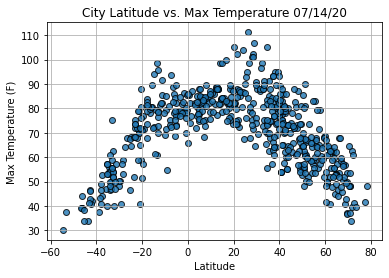

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

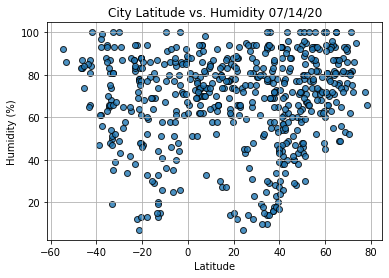

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

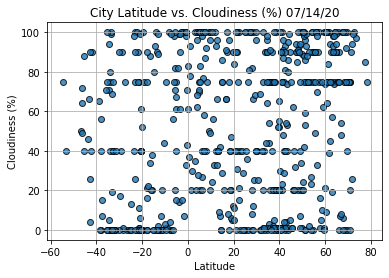

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

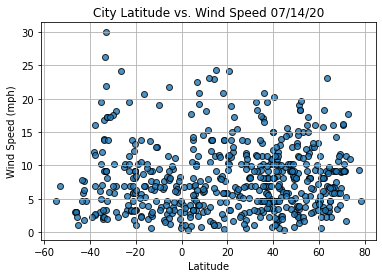

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()